# HW1 ML

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
d = '/Users/mikejaron/Google Drive/QMSS/Machine_Learning/'
X_train = pd.read_csv(d+'hw1-data/X_train.csv', header=None)
X_test = pd.read_csv(d+'hw1-data/X_test.csv', header=None)
y_train = pd.read_csv(d+'hw1-data/y_train.csv', header=None)
y_test = pd.read_csv(d+'hw1-data/y_test.csv', header=None)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [96]:
# print w_df.shape
# print w_df

In [236]:
w_rr.shape

(7, 5001)

In [401]:
def RR(lamda, I, X_train, y_train):
    a = lamda*I + (X_train.transpose().dot(X_train))
    b = np.linalg.pinv(a).dot(X_train.transpose()).dot(y_train)
    
    return b

def RMSE(rr, X_test, y_test):
    a = np.sqrt(np.sum((y_test - X_test.dot(rr))**2)/len(y_test))
    
    return a

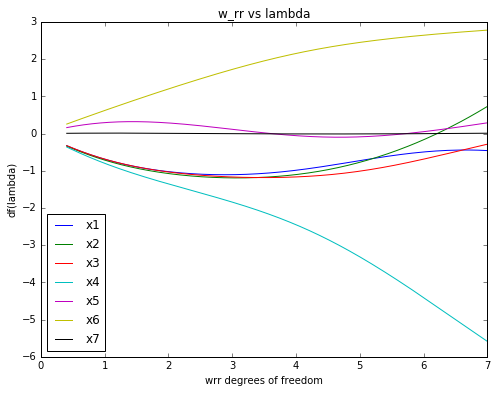

In [402]:
## part 2a

I = np.identity(7)
U,S,V = np.linalg.svd(X_train, full_matrices=False)

df = []
for lamda in range(5001):
    df.append(sum(S**2/(lamda+S**2)))
    
w_rr = np.empty((7,5001))
for lamda in range(5001):
    rr = RR(lamda, I, X_train, y_train)
    w_rr[:,lamda] = list(rr)

plt.figure(figsize=(8, 6))
for i in range(7):
    plt.plot(df, w_rr[i], label='x'+str(i+1))
    
plt.ylabel('df(lambda)')
plt.xlabel('wrr degrees of freedom')
plt.title('w_rr vs lambda')
plt.legend(loc='lower left')
plt.savefig('w_rr_lambda.png')

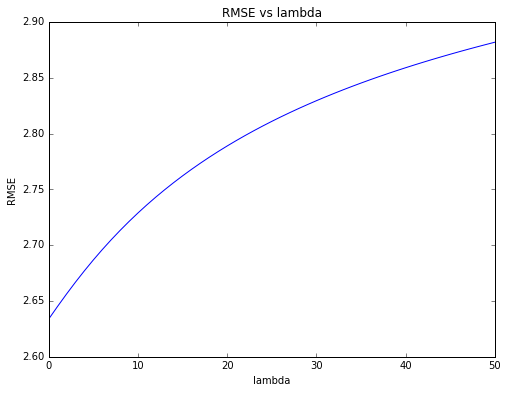

In [403]:
## Part 2b

rmse = []
for lamda in range(51):
    rr = RR(lamda, I, X_train, y_train)
    b = RMSE(rr, X_test, y_test)
    rmse.append(b) 

plt.figure(figsize=(8, 6))
plt.plot(np.array(range(51)), rmse)
    
plt.ylabel('RMSE')
plt.xlabel('lambda')
plt.title('RMSE vs lambda')
plt.savefig('rmse_lambda.png')


(42, 7) (42, 13) (42, 19)


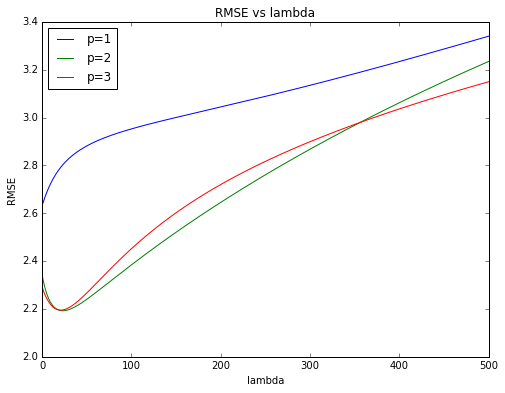

In [404]:
## Part 2d

X_test_2 = np.append(X_test, X_test[:,:6]**2, 1)
X_train_2 = np.append(X_train, x_train[:,:6]**2, 1)
X_test_3 = np.append(X_test_2, X_test[:,:6]**3, 1)
X_train_3 = np.append(X_train_2, X_train[:,:6]**3, 1)

rmse1 = []
rmse2 = []
rmse3 = []

print X_test.shape, X_test_2.shape, X_test_3.shape

for lamda in range(501):
    rr = RR(lamda, I, X_train, y_train)
    b = RMSE(rr, X_test, y_test)
    rmse1.append(b)
    
    rr = RR(lamda, np.identity(13), X_train_2, y_train)
    b = RMSE(rr, X_test_2, y_test)
    rmse2.append(b)
    
    rr = RR(lamda, np.identity(19), X_train_3, y_train)
    b = RMSE(rr, X_test_3, y_test)
    rmse3.append(b)

plt.figure(figsize=(8, 6))
plt.plot(np.array(range(501)), rmse1, label='p=1')
plt.plot(np.array(range(501)), rmse2, label='p=2')
plt.plot(np.array(range(501)), rmse3, label='p=3')
    
plt.ylabel('RMSE')
plt.xlabel('lambda')
plt.title('RMSE vs lambda')
plt.legend(loc='upper left')
plt.savefig('rmse_lambda_pth.png')

In [80]:
'''
I_p2 = eye(13);
[U, S, V] = svd(X_p2, 0)

rmse = ones(1, 500);
for lambda = 1:500
    rmse(lambda) = sqrt(sum((Y_test - (X_test_p2*(V *inv((S*transpose(S)) + lambda*I_p2)*S*transpose(U)*Y))).^2)/42);
end;

figure;
plot(1:500, rmse)
xlabel('lambda, \lambda')
ylabel('rmse_p2')


I_p3 = eye(19);
[U, S, V] = svd(X_p3, 0)

rmse = ones(1, 500);
for lambda = 1:500
    rmse(lambda) = sqrt(sum((Y_test - (X_test_p3*(V *inv((S*transpose(S)) + lambda*I_p3)*S*transpose(U)*Y))).^2)/42);
end;

figure;
plot(1:500, rmse)
xlabel('lambda, \lambda')
ylabel('rmse_p3')
'''

[7.0,
 6.8504825130584095,
 6.7155403644601321,
 6.5927775104974682,
 6.480325515801316]

In [346]:
print (X_test+X_test**2).shape
print X_test.shape
all_data = np.append(X_test, X_test**2, 1)
all_data.shape

(42, 7)
(42, 7)


(42, 14)

In [160]:
U, s, V = np.linalg.svd(x_train, full_matrices=False)
print U.shape, s.shape, V.shape

(350, 7) (7,) (7, 7)


In [377]:
print X_test.shape
print x_train[:,:6]**2

(42, 7)
[[  9.58335849e-02   1.34740385e-01   2.07434703e-01   4.03326889e-02
    5.47481606e-01   6.54238322e-01]
 [  9.58335849e-02   1.29024640e-01   1.34815321e-02   1.47156632e-03
    2.76390625e-02   6.54238322e-01]
 [  7.44613668e-01   9.95564928e-01   8.01938160e-01   1.50087001e+00
    3.12123342e-01   7.07134464e-02]
 ..., 
 [  9.58335849e-02   2.82184064e-01   7.11576602e-01   2.86203600e-01
    3.91485796e+00   7.07134464e-02]
 [  9.58335849e-02   9.01080324e-02   5.49421913e-01   2.59162446e-01
    8.79112512e-03   3.00819341e-01]
 [  2.19662041e+00   1.05698961e+00   4.06164036e-01   7.74276805e-01
    6.02424346e-01   6.72285205e-01]]


# HW 2 ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from pylab import *

/Users/mikejaron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# a
d = '/Users/mikejaron/Google Drive/QMSS/Machine_Learning/hw2/'
X_train = pd.read_csv(d+'hw2-data/X_train.csv', header=None)
X_test = pd.read_csv(d+'hw2-data/X_test.csv', header=None)
y_train = pd.read_csv(d+'hw2-data/y_train.csv', header=None)
y_test = pd.read_csv(d+'hw2-data/y_test.csv', header=None)
names = open(d+'hw2-data/spambase.names', 'rb')
# print names.read()


In [470]:
def the(cl):
    y = y_train[y_train[0] == cl]
    ix_ = y.index.tolist()
    x = X_train.ix[ix_]
    x = x.reset_index(drop=True)
    class_prior = len(y)/float(len(y_train))

    thetas = []
    for i in range(X_train.shape[1]):
        if i <= 53:
            theta = (sum(x[i]) / float(len(x)))
        else:
            theta = (float(len(x)) / sum(np.log(x[i])))
        thetas.append(theta)
    
    return thetas, class_prior


def pred(thetas, class_prior):
    probs = []
    for j in range(len(X_test)):
        prob = 1
        for i in range(X_test.shape[1]):
            if i <= 53:
                prob *= (thetas[i]**X_test[i][j]) * (1-thetas[i])**(1-X_test[i][j])
            else:
                prob *= thetas[i] * X_test[i][j]**-(thetas[i] + 1)
        probs.append(prob * class_prior)
    
    return probs

thetas0, class_prior0 = the(0)
thetas1, class_prior1 = the(1)

probs0 = pred(thetas0, class_prior0)
probs1 = pred(thetas1, class_prior1)

pred = []
for i,j in zip(probs0,probs1):
    if i > j:
        pred.append(0)
    else:
        pred.append(1)

a = 0
b = 0
c = 0
d = 0
for i,j in zip(pred, y_test[0]):
    if i == 1 and j == 1:
        a += 1
    elif i < j:
        b += 1
    elif i > j:
        c += 1
    else:
        d += 1

class_table = pd.DataFrame()
class_table[0] = [d,b]
class_table[1] = [c,a]

print 'Accuracy = ', (54+32)/93.
print ''
print "  y'"
class_table

Accuracy =  0.924731182796

  y'


,0,1
0,54,2
1,5,32


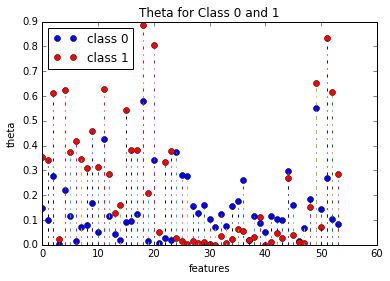

In [431]:
# b, stem plot
markerline, stemlines, baseline = stem(range(54), thetas0[:54], '-.')
setp(markerline, 'markerfacecolor', 'b', label='class 0')
plt.title("Class 0")

markerline, stemlines, baseline = stem(range(54), thetas1[:54], '-.')
setp(markerline, 'markerfacecolor', 'r', label='class 1')
plt.title("Theta for Class 0 and 1")
plt.ylabel('theta')
plt.xlabel('features')
plt.legend(loc='upper left')
plt.savefig('thetas.png', dpi=500)


In [36]:
# c, knn
from operator import itemgetter

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

acc = []
for k in range(1,21):
    print 'k=',k
    pred = []
    for i in range(len(X_test)):
        dist = []
        dist_m = abs(X_train - X_test[i])
        for j in range(len(dist_m)):
            dist.append((j,np.sum(dist_m[j])))
        np.random.shuffle(dist)
        dist_s = sorted(dist,key=itemgetter(1))
        class1 = 0
        class0 = 0
        temp = 0
        for nb in dist_s:
            if temp == nb[1]:
                continue
            temp = nb[1]
            c = y_train[nb[0]]
            if c == 1:
                class1 += 1
            else:
                class0 += 1
            if class0 + class1 == 5:
                break
        if class1 > class0:
            pred.append(1)
        else:
            pred.append(0)
    correct = 0
    for y,y1 in zip(y_test,pred):
        if y == y1:
            correct += 1
    acc.append(float(correct) / len(y_test))
    print float(correct) / len(y_test), len(pred)

k= 1
0.860215053763 93
k= 2
0.881720430108 93
k= 3
0.89247311828 93
k= 4
0.870967741935 93
k= 5
0.860215053763 93
k= 6
0.89247311828 93
k= 7
0.870967741935 93
k= 8
0.860215053763 93
k= 9
0.849462365591 93
k= 10
0.849462365591 93
k= 11
0.860215053763 93
k= 12
0.881720430108 93
k= 13
0.870967741935 93
k= 14
0.89247311828 93
k= 15
0.849462365591 93
k= 16
0.849462365591 93
k= 17
0.881720430108 93
k= 18
0.881720430108 93
k= 19
0.89247311828 93
k= 20
0.881720430108 93


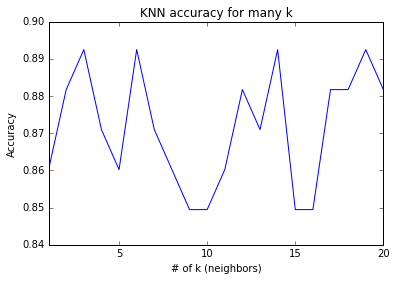

In [40]:
plt.plot(range(1,21), acc)
plt.xlim([1,20])
# plt.ylim([0,1])
plt.title("KNN accuracy for many k")
plt.ylabel('Accuracy')
plt.xlabel('# of k (neighbors)')
plt.savefig('knn.png', dpi=500)

In [263]:
# d 
X_train = pd.read_csv(d+'hw2-data/X_train.csv', header=None)
X_test = pd.read_csv(d+'hw2-data/X_test.csv', header=None)
y_train = pd.read_csv(d+'hw2-data/y_train.csv', header=None)
y_test = pd.read_csv(d+'hw2-data/y_test.csv', header=None)

y_train = y_train.replace(0,-1)
y_test = y_test.replace(0,-1)

X_train[57] = [1]*len(X_train)
X_test[57] = [1]*len(X_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [253]:
from scipy.special import expit

w = [0]
grad = []

for t in range(10):
    nt = 1 / ((10**5) * np.sqrt(t+1))
    likelihood = 0
    for i in range(len(X_train)):
#         sigmoid = np.log(expit(y_train[i][0]*np.dot(X_train[i],w[t]))+.000001)
        likelihood += (1 - expit(np.sum(y_train[i][0]*X_train[i]*w[t]))) * np.dot(y_train[i][0], X_train[i])
#         a = np.sum(np.dot(np.dot(y_train[i][0], np.transpose(X_train[i])),w[t]))
#         theta_yw = expit(a)
#         sums.append(np.sum((1.- theta_yw)* np.dot(y_train[i][0], X_train[i])))
    grad.append(likelihood)
    w.append(w[t] + nt * likelihood)

# # calculate sigma(w) for sigma(y*w)
# function s = sigmoid(y_i, x_i, w)
#     Z = y_i*x_i*w';
#     if Z > 100  # setting it to 100 so dividing 1/(1+exp(-Z)) won't return a NaN
#         Z = 100;
#         s = 1/(1+exp(-Z));
#     else
#         s = 1/(1+exp(-Z));

# for t = 1:10000
#     L_grad= zeros(1,58);
#     eta = 1/(10^5*sqrt(t+1));
#     for n = 1:4508
#         L_grad = (1-sigmoid(Y_mod(n), X_mod(n,:), w(t,:)))* Y_mod(n)*X_mod(n,:) + L_grad;

# w(t+1,:) = eta*L_grad + w(t,:);
    
# #calculating the objective function
# L = zeros(10001, 1);
# for t = 1:10001
#     for n = 1:4508
#         L(t) = log(sigmoid(Y_mod(n), X_mod(n,:), w(t,:))) + L(t);



In [303]:
def sigmoid(i, w_i):
    p = y_train[i] * np.dot(X_train[i].T, w_i)
    return expit(p)

N = 10000
w = np.zeros(N)
L = np.zeros(N)

for t in range(1, N):
    n = 1.0 / (10**5 * np.sqrt(t+1))
    sigma = 0
    for i in range(len(X_train)):
        sigma += y_train[i] * np.dot((1 - sigmoid(i, w[t-1])), X_train[i])
#         l = log(sigmoid(i, w[t-1])) + L[t-1]
#         L[t] = l[0]
    w_t = w[t-1] + n * sigma
    w[t] = w_t
    
# L = zeros(10001, 1)
# for t in range(1000):
#     for n in range(len(X_train)):
#         L(t) = log(sigmoid(Y_mod(n), X_mod(n,:), w(t,:))) + L(t);

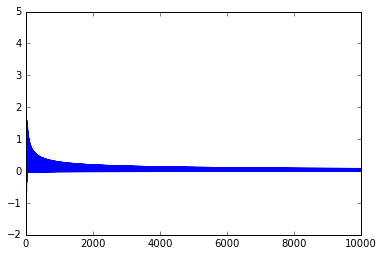

In [304]:
plt.plot(range(len(w)),w)

In [202]:
# e

a = np.asscalar(((expit(np.matrix(X_train[i])* \
np.matrix.transpose(np.matrix(w[t]))))* \
(1-expit(np.matrix(X_train[i])* \
np.matrix.transpose(np.matrix(w[t]))))))* \
np.matrix.transpose(np.matrix(X_train[i]))* \
np.matrix(X_train[i])

ValueError: shapes (1,4508) and (1,4508) not aligned: 4508 (dim 1) != 1 (dim 0)

In [203]:
t,i

(1, 0)

# HW2 AML

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

seed = 7

/Users/mikejaron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [49]:
data_url = "https://ndownloader.figshare.com/files/7586326"
df = pd.read_csv(data_url)
df_og = df.copy()

In [4]:
# all features in vacant data set and predictor variable
# features = ['UF1_1', 'UF1_2', 'UF1_3', 'UF1_4', 'UF1_5', 'UF1_6', 'UF1_7', 
#         'UF1_8', 'UF1_9', 'UF1_10', 'UF1_11', 'UF1_12', 'UF1_13', 'UF1_14',
#         'UF1_15', 'UF1_16', 'UF1_35', 'UF1_17', 'UF1_18', 'UF1_19', 'UF1_20', 
#         'UF1_21', 'UF1_22', 'UF19', 'New_CSR', 'REC15', 'UF23', 'REC62', 'REC64',
#         'REC21', 'CD', 'FW', 'HFLAG6', 'HFLAG3', 'uf17']
# make them all lower case like the data
# features = [i.lower() for i in features]

# keep only neccary columns
# df = df[features]
df.head()

,recid,boro,uf1_1,uf1_2,uf1_3,uf1_4,uf1_5,uf1_6,uf1_7,uf1_8,...,hflag4,hflag18,uf52h_h,uf52h_a,uf52h_b,uf52h_c,uf52h_d,uf52h_e,uf52h_f,uf52h_g
0,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,0,0,0,0
2,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,1,0,1,0
3,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
4,1,1,9,9,9,9,1,9,9,9,...,0,0,1,0,0,0,1,0,0,0


In [5]:
for i in df1.keys():
    print i
#     plt.hist(df[i], bins=20)
    plt.scatter(df1[i], df1['uf17'])
    plt.show()


NameError: name 'df1' is not defined

In [50]:
# missing data
# uf1_1 to uf1_22 either 1 or 8  / 9 missing *most values are missing
# rec21 8 missing
print len(df)
print df.shape
print len(df[df['uf17'] != 99999])
print len(df[df['uf17'] != 7999])
print len(df[df['rec21'] != 8])
print len(df[df['uf1_1'] != 9])

15342
(15342, 197)
10229
15251
15061
235


In [51]:
# remove any features that have to do with renting
remove = ['uf31', 'SEQNO', 'UF17A', 'REC1', 'REC6', 'UF46', 'REC4', 'Rec_Race_A', 'Rec_Race_C', 'REC28', 'PPR', 
          'TOT_PER', 'REC35', 'UF26', 'REC37','UF28', 'REC33', 'UF27', 'REC39', 'REC9', 'UF42', 'UF42A', 'UF34', 
            'UF34A', 'HFLAG18', 'HFLAG4', 'HFLAG12', 'HFLAG11', 'HFLAG91', 'HFLAG10', 'HFLAG9', 'HFLAG2', 'HFLAG1', 
          'FLG_RC1', 'FLG_AG1', 'FLG_SX1', 'CHUFW', 'FW', 'REC7', 'REC8', 'UF29', 'REC32', 'UF30', 'REC36', 'UF40A', 
          'UF40', 'UF39A', 'UF39', 'UF38A', 'UF38', 'UF37A', 'UF37', 'UF36A', 'UF36', 'UF35A', 'UF35', 'RACE1', 
          'UF10' , 'UF8', 'UF9', 'UF7a', 'UF7' ,'UF6', 'Uf5', 'recid', 'SEX/HHR2', 'HHR2', 'HHR3T', 'UF43', 
          'HSPANIC/HHR5', 'HHR5', 'race1', 'UF2A', 'UF2ACNT', 'UF66', 'UF53', 'UF54', 'UF2B,', 'UF2b', 'UF2BCNT',
          'UF2A,', 'UF12', 'UF13', 'UF14', 'UF15', 'UF16', 'UF64',
         'sc51', 'sc52', 'sc53', 'sc54', 'sc110', 'sc111', 'sc112', 'sc113', 'sc115', 'sc116', 'sc120', 
         'sc121', 'sc124', 'sc125', 'sc127', 'sc128', 'sc134', 'sc135', 'sc130', 'sc140', 'sc141', 'sc142',
         'sc143', 'sc144', 'sc145', 'sc181', 'sc570', 'sc574', 'sc560', 'sc117', 'sc118', 'SC26', 'SC27', 'SC166',
         'sc164', 'sc161', 'sc159', 'sc51']
print(len(set(remove)), len(remove))
# make them all lower case like the data
remove = [i.lower() for i in remove]
print(df.shape)
for i in df.keys():
    if 'uf1_' in i or 'uf52h_' in i or i in remove:
        df = df.drop(i, axis=1)
print(df.shape)

(124, 125)
(15342, 197)
(15342, 66)


In [52]:
temp = pd.read_csv('./Downloads/occ_14_long.csv')
temp = temp.fillna('na')
df1 = df.copy()

In [53]:
def find_missing(var, df):
    s = df[df['Source Code'] != 'na'].index.tolist()
    v = df[df['Variable Name'] != 'na'].index.tolist()
    
    if 'sc' in var:
        var = var[2:]
        if len(var) == 2:
            var = '0'+var
        a = df[df['Source Code'] == var].index.tolist()
        loc_s = s.index(a[0])
        num2 = s[loc_s+1]
        temp = v
    else:
        a = df[df['Variable Name'] == var.upper()].index.tolist()
        loc_v = v.index(a)
        num2 = v[loc_v+1]
        temp = s

    for i in range(a[0],max(temp)):
        try:
            loc = temp.index(i)
            break
        except:
            pass

    if temp[loc] < num2:
        num2 = temp[loc]

    df1 = df['Code and Description'][a[0]:num2]

    missing = []
    for i in df1:
        name = i[i.find('=')+1:].lower()
        if 'not reported' in name or 'not selected' in name \
            or 'not applicable' in name or 'not available' in name or 'not found' in name:
            missing.append(i[:i.find('=')])
    
    return missing



In [54]:
for i in df1.keys():
    if 'boro' not in i:
        na_val = find_missing(i, temp)
        if len(na_val) > 0:
            for num in na_val:
                df1[i] = df1[i].replace(num, np.nan)
print df1.head()

   boro  sc23  sc24  sc36  sc37  sc38  sc114  uf48  sc147  uf11   ...    \
0     1   2.0   2.0   2.0   4.0   1.0      2     6    1.0     3   ...     
1     1   2.0   2.0   2.0   2.0   2.0      2     6    1.0     3   ...     
2     1   2.0   2.0   2.0   2.0   2.0      2     6    1.0     3   ...     
3     1   2.0   NaN   2.0   2.0   2.0      1     3    1.0     1   ...     
4     1   2.0   2.0   2.0   2.0   2.0      1     4    1.0     1   ...     

   rec54  rec53  cd  flg_hs1  hflag13  hflag6  hflag3  hflag14  hflag16  \
0    2.0    3.0   1        0        0       0       0        0        0   
1    2.0    2.0   1        0        1       0       0        0        0   
2    1.0    1.0   1        0        0       0       0        0        0   
3    1.0    1.0   1        0        0       0       0        0        0   
4    1.0    2.0   1        0        0       0       0        0        0   

   hflag7  
0       1  
1       0  
2       0  
3       0  
4       0  

[5 rows x 66 columns]


In [55]:
# dont want to predict on missing values
df1 = df1[df1['uf17'] != 99999]
df1 = df1[df1['uf17'] != 7999]
print df1.shape
print df1.keys()

(10138, 66)
Index([u'boro', u'sc23', u'sc24', u'sc36', u'sc37', u'sc38', u'sc114', u'uf48',
       u'sc147', u'uf11', u'sc149', u'sc173', u'sc171', u'sc150', u'sc151',
       u'sc152', u'sc153', u'sc154', u'sc155', u'sc156', u'sc157', u'sc158',
       u'sc174', u'uf17', u'sc541', u'sc184', u'sc542', u'sc543', u'sc544',
       u'sc185', u'sc186', u'sc197', u'sc198', u'sc187', u'sc188', u'sc571',
       u'sc189', u'sc190', u'sc191', u'sc192', u'sc193', u'sc194', u'sc196',
       u'sc548', u'sc549', u'sc550', u'sc551', u'sc199', u'sc575', u'uf19',
       u'new_csr', u'rec15', u'uf23', u'rec21', u'rec62', u'rec64', u'rec54',
       u'rec53', u'cd', u'flg_hs1', u'hflag13', u'hflag6', u'hflag3',
       u'hflag14', u'hflag16', u'hflag7'],
      dtype='object')


In [56]:
# continuious features
cont_feat = ['sc150', 'sc151', 'uf11', 'uf48', 'uf11', 'sc571', 'rec54', 'rec53',
    'sc186', 'uf23' ] # look at this row


In [205]:
y = np.array(df1['uf17'])
X = df1.drop('uf17', axis=1)

from sklearn.preprocessing import Imputer

# imp = Imputer(strategy="median", axis=0).fit(X)
# X = imp.transform(X)
for col in X.keys():
    fill = round(np.mean(X[col]),0)
    X[col] = X[col].fillna(fill)

# split by feature types
Xcont = X[cont_feat]
Xcat = X.drop(cont_feat, axis=1)

# print set(X[:,1])
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MultiLabelBinarizer
# lb = LabelBinarizer()
lb = OneHotEncoder()
# lb.fit(X[:,1])
# print lb.classes_
# lb.transform(lb.classes_)

new_x = lb.fit_transform(Xcat).toarray()
print Xcat.shape, new_x.shape, Xcont.shape
# for i in range(1, X.shape[1]):
#     t = lb.fit_transform(X[:,i])
#     new_x = np.append(new_x, t, 1)
    
print type(new_x)

(10138, 56) (10138, 190) (10138, 10)
<type 'numpy.ndarray'>


In [206]:
# import scipy.sparse as sp
# X = sp.hstack((new_x,Xcont), format='csr')
X = np.hstack((new_x,Xcont))
print X.shape, type(X)

(10138, 200) <type 'numpy.ndarray'>


In [207]:
# from sklearn.preprocessing import PolynomialFeatures, scale
# X = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(X.toarray())
# print X.shape, X_poly.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(type(X_test), type(y_test), type(y_train), type(X_train))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <type 'numpy.ndarray'>)


In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# model = SVR()
# model = Lasso(alpha=.20)
model = Ridge(random_state=seed)
# model = LinearRegression()
# model = RandomForestRegressor()

clf = make_pipeline(StandardScaler(), model)

# param_grid = {'alpha': np.logspace(-3, 3, 7)}
# grid = GridSearchCV(clf, param_grid, 5)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

# print cross_val_score(clf, X_train, y_train, cv=5).mean()
# predicted = cross_val_predict(clf, X_test, y_test, cv=5)



model.fit(X_train, y_train)
score = model.score(X_test, y_test)
predicted = model.predict(X_test)
print score

0.571460841161


In [158]:
# X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X_train))
# print X_poly.shape
# print cross_val_score(clf, X_poly, y_train, cv=10).mean()
np.logspace(-3, 3, 7)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

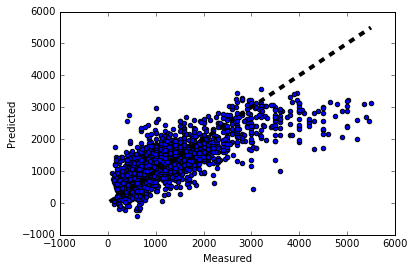

In [200]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [99]:
a = df['sc23']
a = df['sc173']
b = np.std(a)
print b, 2*b, np.mean(a)

3.79033994872 7.58067989744 5.59163543105


In [289]:
temp = pd.read_csv('./Downloads/occ_14_long.csv')
temp = temp.fillna('na')

In [210]:
pd.__version__

u'0.18.1'

In [443]:
for i in df.keys():
    if 'boro' not in i:
        print i
        print find_missing(i, temp)

sc23
['8']
sc24
['8']
sc36
['8']
sc37
['8']
sc38
['8']
sc114
[]
uf48
[]
sc147
['8']
uf11
[]
sc149
[]
sc173
['8', '9']
sc171
['8']
sc150
[]
sc151
[]
sc152
[]
sc153
['9']
sc154
['8', '9']
sc155
[]
sc156
['9']
sc157
['8', '9']
sc158
[]
sc174
['8']
uf64
[]
uf17
[]
sc541
['8', '9']
sc184
['8', '9']
sc542
['8', '9']
sc543
['8', '9']
sc544
['8', '9']
sc185
['8']
sc186
['8']
sc197
['8']
sc198
['8']
sc187
['8']
sc188
['8']
sc571
['8']
sc189
['8']
sc190
['8']
sc191
['8']
sc192
['8']
sc193
['8']
sc194
['8']
sc196
['8']
sc548
['8']
sc549
['8']
sc550
['8']
sc551
['8']
sc199
['8']
sc575
['8']
uf19
['2']
new_csr
[]
rec15
['10', '11', '12']
uf23
[]
rec21
['8']
rec62
[]
rec64
[]
rec54
['7']
rec53
['9']
cd
[]
flg_hs1
[]
hflag13
[]
hflag6
[]
hflag3
[]
hflag14
[]
hflag16
[]
hflag7
[]
